In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)

mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv" 

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

In [4]:
# Combine the data into a single dataset
# What do these two functions do differently? 
# Is there a way to merge data sets specifically in matplotlib? 

combined_df = pd.merge(mouse_df, clinical_df, on="Mouse ID")
combined_df

#combined_df = mouse_data.add(clinical_data, fill_value=0)
#combined_df

# Display the data table for preview

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_group = combined_df.groupby(['Drug', 'Timepoint'])
avg_tumor = tumor_group["Tumor Volume (mm3)"].mean()
avg_tumor 

# Convert to DataFrame

avgtumor_df = pd.DataFrame(avg_tumor).reset_index()

# Preview DataFrame

avgtumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

avgtumor_error = tumor_group["Tumor Volume (mm3)"].sem()
avgtumor_error

# Convert to DataFrame

avgtumor_error_df = pd.DataFrame(avgtumor_error).reset_index()


# Preview DataFrame

avgtumor_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames

reformat_avgtumor = avgtumor_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked

reformat_avgtumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


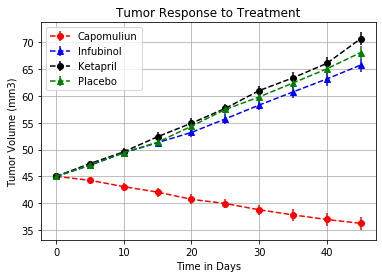

In [9]:
# Generate the Plot (with Error Bars)

capo_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Capomulin", "Tumor Volume (mm3)"]
infu_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Infubinol", "Tumor Volume (mm3)"]
keta_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Ketapril", "Tumor Volume (mm3)"]
placebo_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Placebo", "Tumor Volume (mm3)"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, reformat_avgtumor["Capomulin"] , yerr= capo_error, label= "Capomuliun", marker= "o", color= "red", linestyle='--')
plt.errorbar(Time, reformat_avgtumor["Infubinol"] , yerr= capo_error, label= "Infubinol", marker= "^", color= "blue", linestyle='--')
plt.errorbar(Time, reformat_avgtumor["Ketapril"] , yerr= capo_error, label= "Ketapril", marker= "o", color= "black", linestyle='--')
plt.errorbar(Time, reformat_avgtumor["Placebo"] , yerr= capo_error, label= "Placebo", marker= "^", color= "green", linestyle='--')

plt.legend()

plt.title("Tumor Response to Treatment")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

# Save the Figure

plt.savefig("Images/Tumor_Response.png")

# Show the Figure

plt.show()

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

tumor_group = combined_df.groupby(["Drug", "Timepoint"])
avg_metsite = tumor_group["Metastatic Sites"].mean()
avg_metsite

# Convert to DataFrame

avgmetsite_df = pd.DataFrame(avg_metsite).reset_index()

# Preview DataFrame

avgmetsite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

avgmetsite_error = tumor_group["Metastatic Sites"].sem()

# Convert to DataFrame

avgmetsite_error_df = pd.DataFrame(avgmetsite_error).reset_index()

# Preview DataFrame

avgmetsite_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames

reformat_avgmetsite = avgmetsite_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked

reformat_avgmetsite.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [15]:
# Generate the Plot (with Error Bars)

capo_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Capomulin", "Metastatic Sites"]
infu_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Infubinol", "Metastatic Sites"]
keta_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Ketapril", "Metastatic Sites"]
placebo_error = avgtumor_error_df.loc[avgtumor_error_df ['Drug'] == "Placebo", "Metastatic Sites"]

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.errorbar(Time, reformat_avgmetsite["Capomulin"] , yerr= capo_error, label= "Capomuliun", marker= "o", color= "red", linestyle='--')
plt.errorbar(Time, reformat_avgmetsite["Infubinol"] , yerr= capo_error, label= "Infubinol", marker= "^", color= "blue", linestyle='--')
plt.errorbar(Time, reformat_avgmetsite["Ketapril"] , yerr= capo_error, label= "Ketapril", marker= "o", color= "black", linestyle='--')
plt.errorbar(Time, reformat_avgmetsite["Placebo"] , yerr= capo_error, label= "Placebo", marker= "^", color= "green", linestyle='--')

plt.legend()

plt.title("Metasatic Data During Treatment")
plt.xlabel("Treatment Time in Days")
plt.ylabel("Met Sites")

plt.grid()


# Save the Figure

plt.savefig("Images/Met_Site.png")
           
# Show the Figure
           
plt.show()

KeyError: 'Metastatic Sites'

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mice_group = combined_df.groupby(['Drug', 'Timepoint'])
count_mice = mice_group["Mouse ID"].count()

# Convert to DataFrame

countmice_df = pd.DataFrame(count_mice).reset_index()

# Preview DataFrame

countmice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

reformat_countmice = countmice_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview the Data Frame

reformat_countmice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


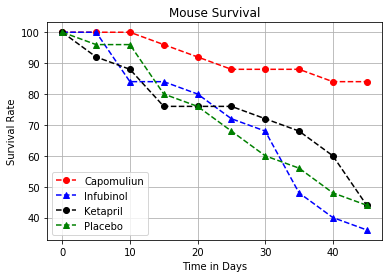

In [21]:
# Generate the Plot (Accounting for percentages)
# Divide by 25 because there are 

Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

plt.plot(Time, (reformat_countmice["Capomulin"]/25)*100 , label= "Capomuliun", marker= "o", color= "red", linestyle='--')
plt.plot(Time, (reformat_countmice["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color= "blue", linestyle='--')
plt.plot(Time, (reformat_countmice["Ketapril"]/25)*100 , label= "Ketapril", marker= "o", color= "black", linestyle='--')
plt.plot(Time, (reformat_countmice["Placebo"]/25)*100 , label= "Placebo", marker= "^", color= "green", linestyle='--')

plt.legend()

plt.title("Mouse Survival")
plt.xlabel("Time in Days")
plt.ylabel("Survival Rate")

plt.grid()

# Save the Figure

plt.savefig("Images/Survival_Rate.png")

# Show the Figure
plt.show()

In [22]:
# Calculate the percent changes for each drug

tumor_count = 45
percent_change = ((reformat_avgtumor.loc[45,:] - tumor_count)/tumor_count)*100

# Display the data to confirm
percent_change 

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple
percent_change = tuple(zip(percent_change.index, percent_change))
percentchange_list = list(percent_change)

percentchange_list 

# Splice the data between passing and failing drugs

passing = []
failing = []

passing_index = []
failing_index = []

for D, elements in percentchange_list :
    if elements > 0:
        passing_drug = elements 
        passing.append(elements)
        passing_index.append(D)
    else :
        failing_drug = elements 
        failing.append(elements)
        failing_index.append(D)
        
p_drugs = list(zip(passing_index, passing))
f_drugs = list(zip(failing_index, failing))

TypeError: zip argument #1 must support iteration

In [31]:
# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots()
y_value = [percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"]]
x_axis_1 = [0]
x_axis_2 = [1, 2, 3]

bar_1 = ax.bar(x_axis_1, percent_change["Capomulin"], color='g', alpha=0.8, align='edge', width = -1) 
bar_2 =ax.bar(x_axis_2, y_value, color='r', alpha=.8, align='edge', width = -1)
labels = ["Capomulin",  "Infubinol", "Ketapril", "Placebo"]

plt.setp(ax, xticks=[0, 1, 2, 3], xtickslabels=["Capomulin", "Infubinol", "Ketapril", "Placebo"],
         yticks=[-20, 0, 20, 40, 60])

ax.set_ylabel('Tumor Volume Change (%)')
ax.set_title('Tumor Change Over Treatment')
ax.grid()


# Use functions to label the percentages of changes

def label(rects):
    for rect in rects:
        height = rect.get_height()
        (ax.text(rect.get_x() + rect.get_width())/2, .1 * height, ha="center", va="top" color="white")

# Call functions to implement the function calls

label(bar_1)
label(bar_2)
fig.tight_layout()

SyntaxError: invalid syntax (<ipython-input-31-aaf2233a6a65>, line 25)

In [33]:
# Save the Figure

plt.savefig("Images/Tumor_Change.png")

# Show the Figure

plt.show()

<Figure size 432x288 with 0 Axes>

Observations:

1. Across the board, the drugs tested were generally ineffective over the 45 day trial period, with Capomulin and Ramicane having the most positive impact, decreasing the number of tumors. All other drugs had every similar effects to the placebo, none at all. 

2. Likewise, both Capomulin and Ramicane experienced the smallest increase to metastatic sites over the 45 day time frame. 

3. The mouse count over the 45 day time frame also reflects the suggested effectiveness of Capomulin and Ramicane with both drugs having significsntly higher survival rates than all other drugs tested. 
